![Bikeshare Insights Header Image](bike_share_header.png)


# Bikeshare Insights: Summer in the Windy City 

This dataset contains information on Divvy Bikes, a bikeshare program that provides residents and visitors of Chicago with a convenient way to explore the city. 

The workspace is set up with one CSV file containing bikeshare activities at the peak of the summer-July 2023. Columns include ride ID, bike type, start and end times, station names and IDs, location coordinates, and member type. 
[Source: Divvy Bikes](https://divvybikes.com/system-data)

## Data Loading
In this section, we load the dataset from the Parquet file for analysis and display the first 10 rows to provide an initial overview of the data.

### Import Required libraries 
Import necessary libararies such as pandas for manipulation and matplotlib and Seaborn for data visualization. Additionally, install the Fastparquet library if not installed for reading the Parquet file.  You can install it using ```python !pip install fastparquet```


In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_parquet("202307-divvy-tripdata.parquet")
data.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member


## Dataset Information and Distribution

In this section, we gather essential information about the dataset to better understand its structure and data quality

### Define a Function for the Dataset information
Define a python function `data_info()`, to generate summary of the dataset's attributes the `data.describe()` to provide the statistical summary.
- Column name 
- Number of non-null values
- Number of null values
- Percentage of null values 
- Data type





In [176]:

# Get information about the dataset
def data_info():
    data_info = pd.DataFrame({
    'Column': data.columns,
    'Non-Null Count' : data.count(),
    'Null Count' : data.isnull().sum(),
    '% Null' : (data.isnull().sum() / len(data)) * 100,
    'Data Type': data.dtypes
})
    return data_info

display(data_info(), data.describe())

,Column,Non-Null Count,Null Count,% Null,Data Type
ride_id,ride_id,767650,0,0.000000,object
rideable_type,rideable_type,767650,0,0.000000,object
started_at,started_at,767650,0,0.000000,object
ended_at,ended_at,767650,0,0.000000,object
start_station_name,start_station_name,644707,122943,16.015502,object
start_station_id,start_station_id,644707,122943,16.015502,object
end_station_name,end_station_name,637346,130304,16.974402,object
end_station_id,end_station_id,637346,130304,16.974402,object
start_lat,start_lat,767650,0,0.000000,float64
start_lng,start_lng,767650,0,0.000000,float64


,start_lat,start_lng,end_lat,end_lng
count,767650.000000,767650.000000,766396.000000,766396.000000
mean,41.905647,-87.646413,41.906054,-87.646643
std,0.042675,0.026904,0.042829,0.027046
min,41.648501,-87.920000,41.610000,-87.920000
25%,41.883073,-87.660000,41.883181,-87.660000
50%,41.901087,-87.642962,41.902924,-87.643118
75%,41.931931,-87.629544,41.932418,-87.629634
max,42.070000,-87.528232,42.180000,-87.510000


### Handling Missing Values
Based on the data information we've removed rows with missing values and filter out trips with less than 60 seconds. These primarily occurred in columns related to bike stations and geo-spatial data, accounting for approximately 16-17 percent of the dataset. This approach maintains data quality and integrity while having a minimal impact on our analysis.

### Convert to columns to approiate data type
Convert the 'started_at' and 'ended_at' to pandas datetime data format

### Calculate Ride Duration 
Create a new column 'ride_length' to represent the difference in seconds between 'start_at' and 'end_at' and view the histgram distribution

In [177]:

# Convert started_at and ended_at to datetime
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at']) 


# Calculate the duration of each trip in seconds
data['ride_length'] = (data['ended_at'] - data['started_at']).dt.total_seconds()

# Filter out trips with durations less than 60 seconds
data = data[data['ride_length'] >= 60]

# Remove rows with null values
data = data.dropna()
display(data_info(), data.describe())


,Column,Non-Null Count,Null Count,% Null,Data Type
ride_id,ride_id,562869,0,0.0,object
rideable_type,rideable_type,562869,0,0.0,object
started_at,started_at,562869,0,0.0,datetime64[ns]
ended_at,ended_at,562869,0,0.0,datetime64[ns]
start_station_name,start_station_name,562869,0,0.0,object
start_station_id,start_station_id,562869,0,0.0,object
end_station_name,end_station_name,562869,0,0.0,object
end_station_id,end_station_id,562869,0,0.0,object
start_lat,start_lat,562869,0,0.0,float64
start_lng,start_lng,562869,0,0.0,float64


,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length
count,562869,562869,562869.000000,562869.000000,562869.000000,562869.000000,562869.000000
mean,2023-07-17 07:01:56.268374784,2023-07-17 07:20:42.819065344,41.903661,-87.644127,41.904168,-87.644436,1126.550691
min,2023-07-01 00:00:00,2023-07-01 00:03:43,41.648501,-87.836744,41.648501,-87.843960,60.000000
25%,2023-07-09 15:15:46,2023-07-09 15:40:12,41.881927,-87.656063,41.882664,-87.656936,400.000000
50%,2023-07-17 16:02:33,2023-07-17 16:18:36,41.898587,-87.640981,41.899390,-87.641170,693.000000
75%,2023-07-24 17:09:54,2023-07-24 17:25:28,41.929169,-87.627691,41.929546,-87.627691,1234.000000
max,2023-07-31 23:59:15,2023-08-01 20:40:50,42.064854,-87.528232,42.064854,-87.528232,147471.000000
std,NaN,NaN,0.040777,0.024435,0.040940,0.024643,2258.747766


c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


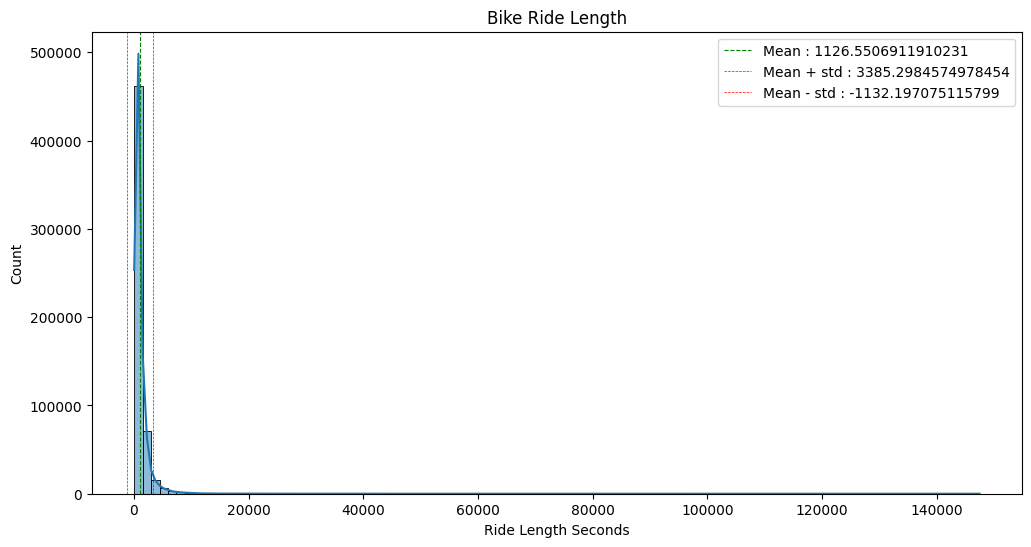

c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


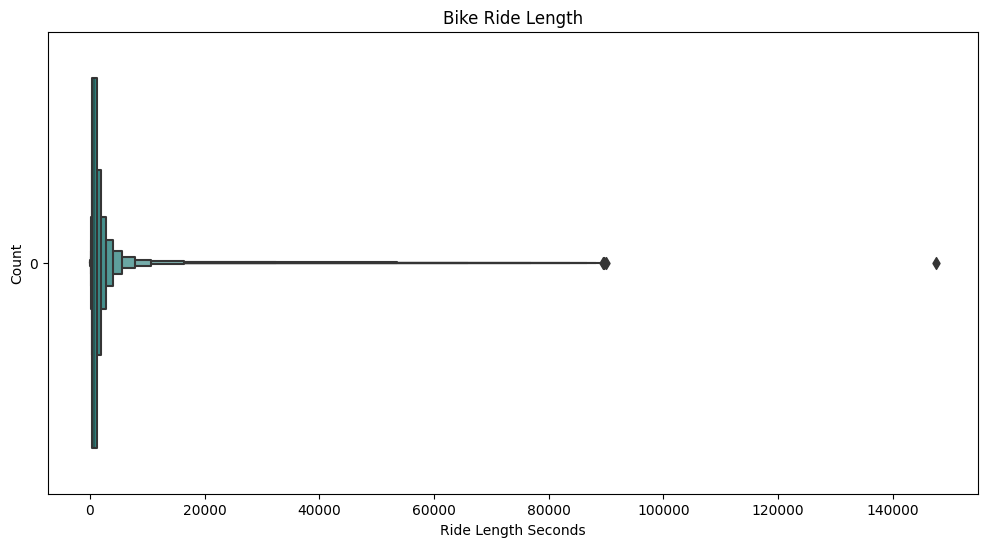

In [178]:
# Histogram: Bike Ride Length
plt.figure(figsize=(12, 6))
plt.title('Bike Ride Length')
plt.xlabel('Ride Length Seconds')
plt.ylabel('Count')
sns.histplot(data['ride_length'], bins=100, kde=True)
#plt.xticks([501, 50, 0])

# Calculate the mean and standard deviation
ride_length_mean = data['ride_length'].mean()
ride_length_std = data['ride_length'].std()
plt.axvline(ride_length_mean, color='g', linestyle='dashed', linewidth=0.8, label=(f'Mean : {ride_length_mean}'))
plt.axvline(ride_length_mean + ride_length_std, color='r', linestyle='dashed', linewidth=0.5, label=(f'Mean + std : {ride_length_mean + ride_length_std}'))
plt.axvline(ride_length_mean - ride_length_std, color='r', linestyle='dashed', linewidth=0.5, label=(f'Mean - std : {ride_length_mean - ride_length_std}'))
plt.legend()
plt.show()

# Plot Box plot: Bike Ride Length

plt.figure(figsize=(12, 6))
plt.title('Bike Ride Length')
plt.xlabel('Ride Length Seconds')
plt.ylabel('Count')
sns.boxenplot(data['ride_length'], orient='h', palette="viridis")
plt.show()

The summary statists and visuals show that the average ride seconds in 1126.550691 that is 18 to 19 minutes

In [179]:
1126.550691	/ 60

18.77584485

# Visualization

## Bike type analysis

c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


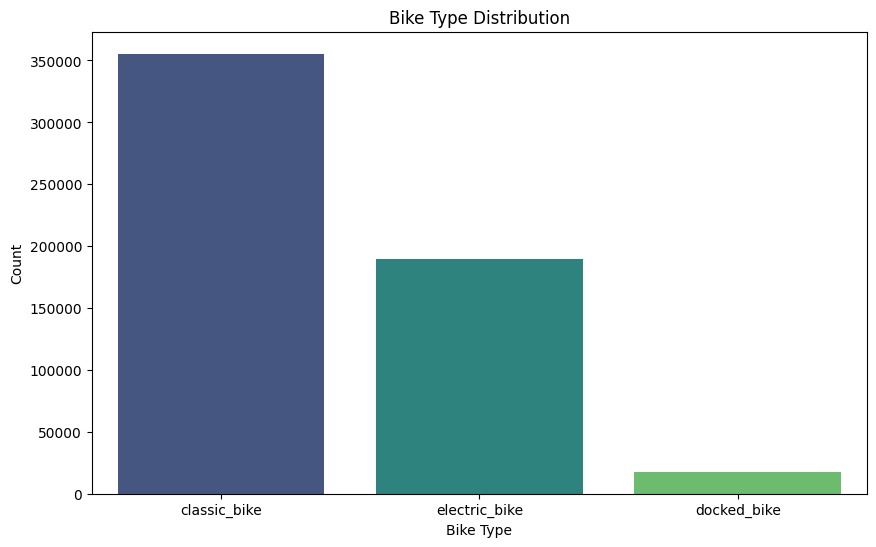

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bike_type_counts = data['rideable_type'].value_counts()
plt.figure(figsize=(10, 6)) 
sns.barplot(x= bike_type_counts.index, y= bike_type_counts.values, palette="viridis")
plt.title('Bike Type Distribution')
plt.xlabel('Bike Type')
plt.ylabel('Count')
plt.show()

There three unique types of rideable bikes. Classic bike been most populare then followed by electric bike and the least is the docked bike.  

c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

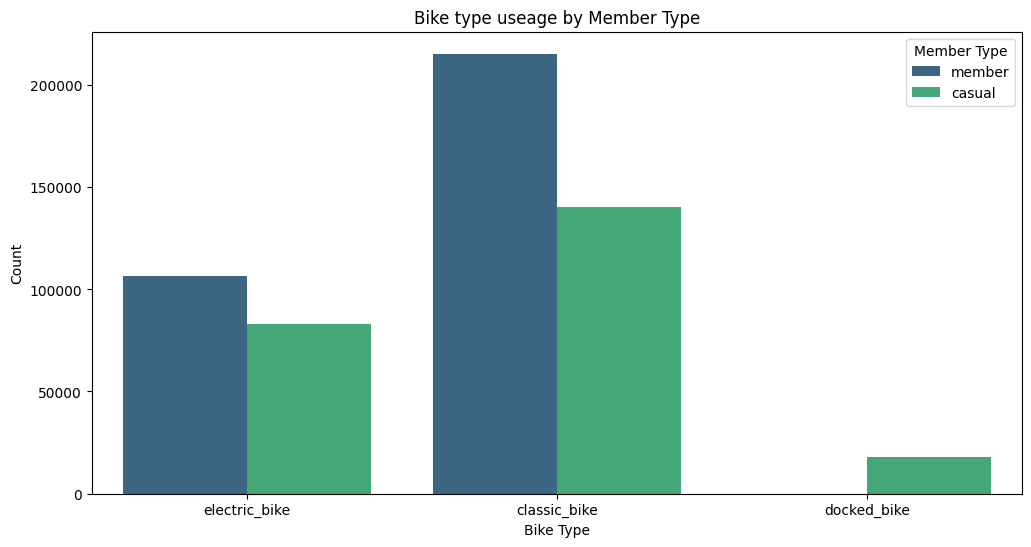

In [181]:
# Riders by bike type
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x = 'rideable_type', hue= 'member_casual', palette="viridis",)

# Display data labels
# plt.annotate()

plt.title('Bike type useage by Member Type')
plt.xlabel('Bike Type')
plt.ylabel('Count')
plt.legend(title ='Member Type')
plt.show()


there two membership for riders. Member and Casual. there are more member than the causal membership type. members ride mostly classic bike and electric bike only. whilw the causal members rides the three catagotries of bike

## Station Visuals
### Top 10 Start and End Stations


c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


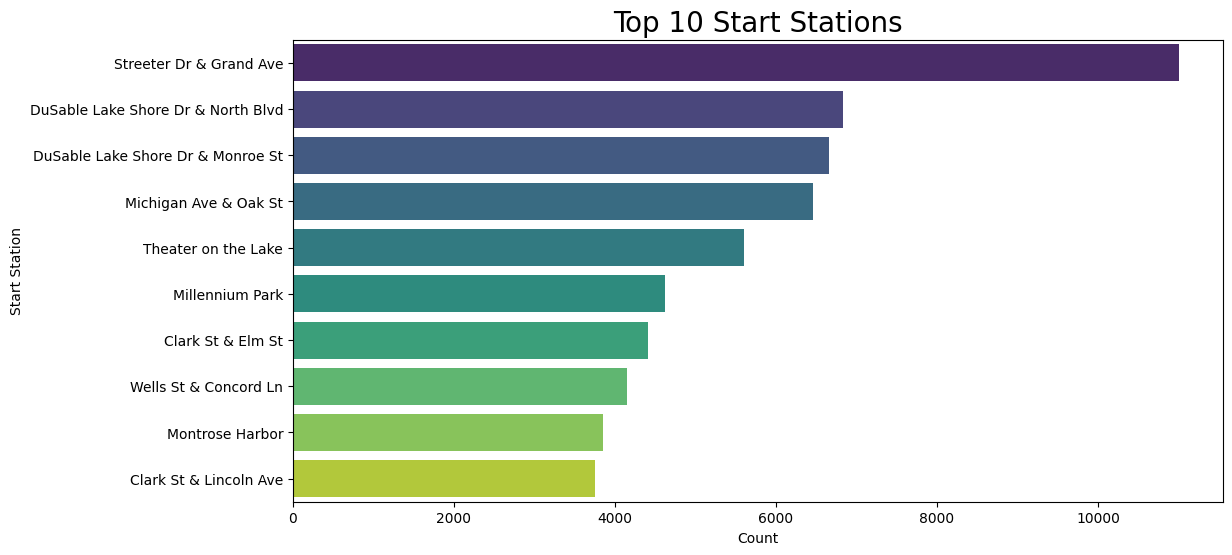

c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


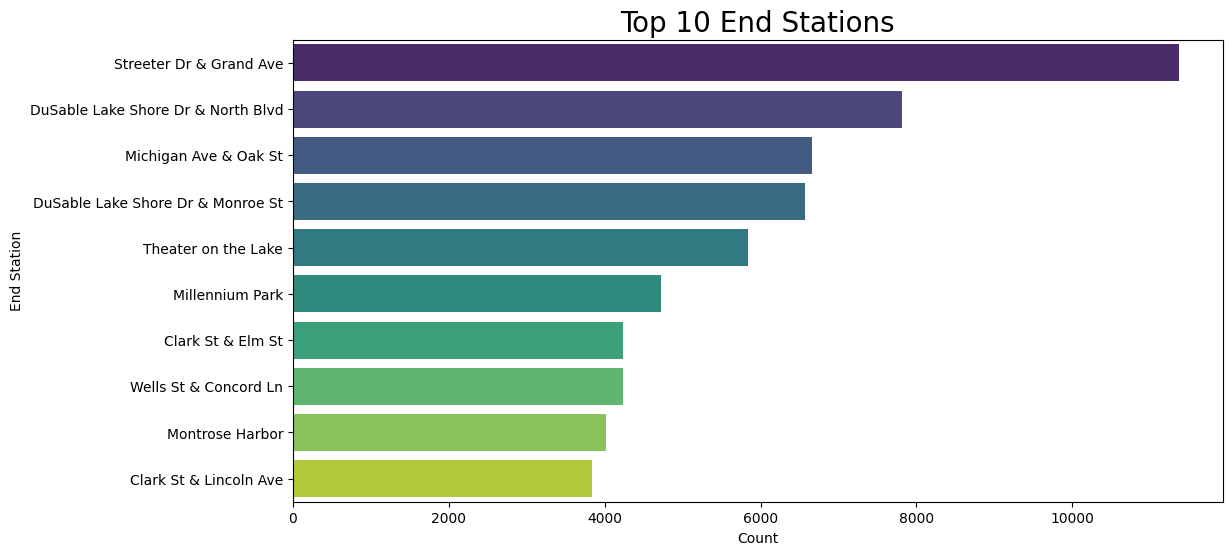

In [182]:
# Station analysis
start_station_counts = data['start_station_name'].value_counts().head(10)
end_station_counts = data["end_station_name"]. value_counts().head(10)

# Start Station plot
plt.figure(figsize=(12, 6))
sns.barplot(x= start_station_counts.values,y = start_station_counts.index, palette = "viridis")	
plt.title('Top 10 Start Stations', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Start Station') 

plt.show()

# End Station plot
plt.figure(figsize=(12, 6))
sns.barplot(x= end_station_counts.values,y = end_station_counts.index, palette = "viridis")
plt.title('Top 10 End Stations', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('End Station')
plt.show()  

C:\Users\Educity\AppData\Local\Temp\ipykernel_12908\4083628017.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data.groupby(['hour', 'day_of_week'])['rideable_type'].count().unstack()


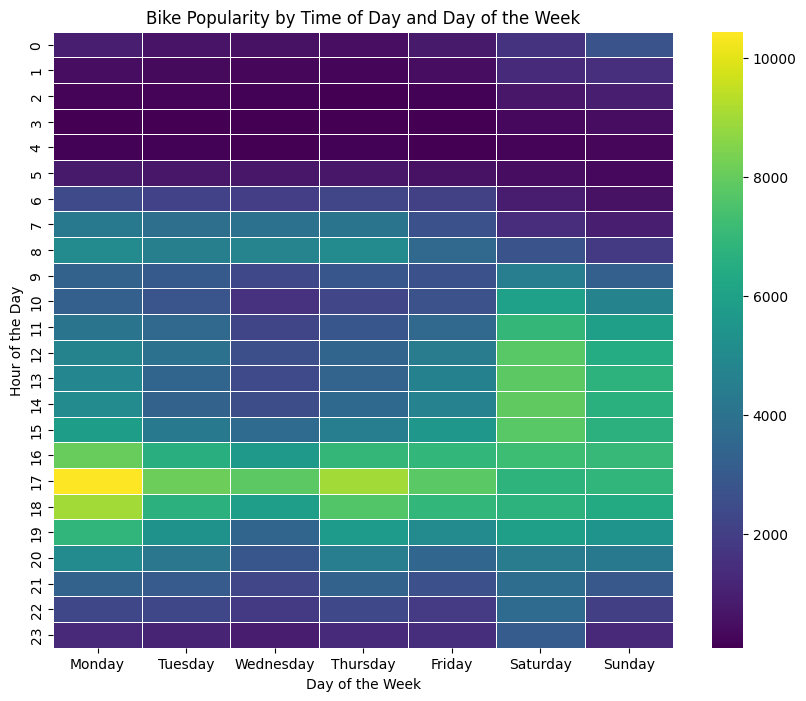

In [183]:
# Heatmap: Bike popularity by time of day and day of the week
data['hour'] = data['started_at'].dt.hour
data['day_of_week'] = pd.Categorical(data['started_at'].dt.day_name(), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

heatmap_data = data.groupby(['hour', 'day_of_week'])['rideable_type'].count().unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(data=heatmap_data, cmap='viridis', annot=False, fmt='d', linewidths= 0.5)
plt.title('Bike Popularity by Time of Day and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()


The heatmap indicates highest bike usage on Monday at 17:00 to 18:00. Bike usage is more evenly distrubted on the weekends (Saturday and Sunday) and overall there is mininmal usage of bike at late nigth after 22:00 till 6:00 workdays(Monday to Friday) and 8:00 weekends (Saturday and Sunday)

In [184]:
# Geospatial Analysis (for latitude and longitude columns)
# Visualize start station locations on a scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='start_lng', y='start_lat', hue='rideable_type', palette="coolwarm", alpha=0.5)
plt.title('Start Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Bike Type')
plt.show()

c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype